In [52]:
from random import random
from random import expovariate as expo
import numpy as np
import pandas as pd

class Contar:
	def __init__(self,salida,llegada):
		self.llegada = llegada
		self.salida = salida
	def c1(self,x):
		if self.salida<=x and x<self.llegada:
			return x
	def c2(self,x):
		if self.salida<=x:
			return x

def lineaE():
	t0 = 0
	l0 = [] # tiempos de interllegada
	l1 = [] # tiempo de llegada
	l2 = [] # tiempo de servicio
	l3 = [] # inicio del servicio
	l4 = [] # fin del servicio
	c  = [] # clientes en la fila
	s = 0 # total de clientes en la fila
	k = 0 # indice
	for i in range(60):
		t = expo(1/3) # distribucion de llegadas
		l0.append(t)

		t0+=t
		l1.append(t0) # llegadas

		# Clientes
		if i==0:
			c.append(s)
		elif t0 < l4[k]:
			s+=1# contar clientes que llegan
			c.append(s)
		elif t0 > l4[k]:
		# clientes que se fueron
			w = len( list(filter(Contar(l4[k],t0).c1,l4)) )

			# total de gente en la fila
			j = len( list(filter(Contar(l4[k],t0).c2,l4)) )
			k+=w
			if s > 0:
				s = j - w
				c.append(s)
			else:
				s = 0
				c.append(s)
	  # inicio del servicio
		if i==0:
			t1 = t
			l2.append(t1)
		else:
			t1 = max( l4[i-1] , t0 )
			l2.append(t1)

		u = 3*random()+1 # distribucion del servicio
		l3.append(u)

		l4.append(t1+u) # fin del servicio

	return pd.DataFrame(np.round([l0,l1,c,l2,l3,l4],2).T ,
		                    columns = ["t",
												          "tiempo de llegada",
																	"clientes",
																	"inicio del servicio",
																	"tiempo de servicio",
																	"fin del servicio"])

simu = lineaE()
simu

,t,tiempo de llegada,clientes,inicio del servicio,tiempo de servicio,fin del servicio
0,0.79,0.79,0.0,0.79,1.90,2.70
1,2.53,3.33,0.0,3.33,2.56,5.88
2,5.35,8.68,0.0,8.68,2.74,11.42
3,0.61,9.29,1.0,11.42,2.99,14.40
4,1.25,10.55,2.0,14.40,1.43,15.84
5,2.05,12.59,2.0,15.84,3.54,19.38
6,0.24,12.84,3.0,19.38,1.64,21.02
7,1.97,14.81,3.0,21.02,2.47,23.49
8,1.57,16.38,3.0,23.49,2.19,25.68
9,0.60,16.98,4.0,25.68,3.31,28.99


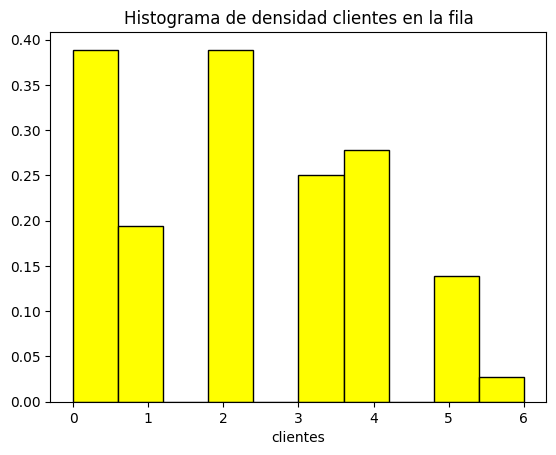

In [53]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.hist(simu['clientes'],color='yellow',density=True,edgecolor='black')
plt.title("Histograma de densidad clientes en la fila")
plt.xlabel("clientes")
plt.show()